# **Import Libraries and modules**

###Second Revision:</br>
###Updates:</br>
* Reducing channels thereby reducing kernals & total parameters</br>
* Removing Bias parameters</br>
* Introduce Batch normalization </br>
###Summary:</br>
Parameters reduced to 17,726</br>
Accuracy reduced to 99.2, even though the parameters are reduced a lot</br>
No.of Epochs : 20</br>
Batch Size : 32</br>


In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


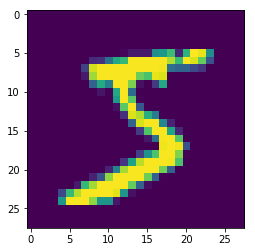

In [67]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [70]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [72]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [73]:
from keras.layers import Activation, MaxPooling2D,BatchNormalization
from keras.optimizers import Adam
model = Sequential() 

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1),use_bias=False,name='layer1'))#......26......rf3....
model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False,name='layer2'))#......24......rf5....
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu',use_bias=False,name='layer3'))#......22......rf7....
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, 1, activation='relu',use_bias=False,name='layer5'))#......11......rf14....

model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False,name='layer6'))#......9......rf16....
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu',use_bias=False,name='layer7'))#......7......rf18....
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, 1, activation='relu',use_bias=False,name='final'))
model.add(Convolution2D(10, 7, 7, use_bias=False,name='layer8'))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False, name="layer1")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False, name="layer2")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False, name="layer3")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False, name="layer5")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
layer2 (Conv2D)              (None, 24, 24, 16)        1440      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
layer3 (Conv2D)              (None, 22, 22, 32)        4608      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [75]:
model.fit(X_train, Y_train, batch_size=20, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 44s 733us/step - loss: 0.1222 - acc: 0.9623
Epoch 2/20
60000/60000 [==============================] - 45s 752us/step - loss: 0.0497 - acc: 0.9843
Epoch 3/20
60000/60000 [==============================] - 42s 697us/step - loss: 0.0369 - acc: 0.9885
Epoch 4/20
60000/60000 [==============================] - 43s 721us/step - loss: 0.0325 - acc: 0.9900
Epoch 5/20
60000/60000 [==============================] - 42s 701us/step - loss: 0.0278 - acc: 0.9908
Epoch 6/20
60000/60000 [==============================] - 43s 722us/step - loss: 0.0237 - acc: 0.9925
Epoch 7/20
60000/60000 [==============================] - 44s 731us/step - loss: 0.0213 - acc: 0.9930
Epoch 8/20
60000/60000 [==============================] - 36s 600us/step - loss: 0.0186 - acc: 0.9939
Epoch 9/20
60000/60000 [==============================] - 43s 722us/step - loss: 0.0168 - acc: 0.9946
Epoch 10/20
60000/60000 [==============================] - 43s 723us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [77]:
print(score)

[0.030956398702893555, 0.992]


In [0]:
y_pred = model.predict(X_test)

In [79]:
print(y_pred[:9])
print(y_test[:9])

[[7.85542150e-14 1.29813505e-13 2.49132881e-10 4.43963972e-06
  2.90194843e-15 3.96098822e-12 1.41486337e-30 9.99994755e-01
  2.37423318e-14 8.90375077e-07]
 [1.19888433e-10 3.01196201e-09 1.00000000e+00 1.10354366e-14
  4.27763077e-12 2.50540827e-18 1.24714119e-11 1.88241129e-14
  5.67503835e-13 1.42710708e-20]
 [3.52102592e-12 1.00000000e+00 3.98268267e-12 1.03328787e-14
  3.13046228e-10 5.66511948e-10 2.54677399e-12 2.95761637e-10
  3.30986419e-11 1.54244120e-12]
 [9.99999285e-01 1.66644116e-18 4.15745172e-09 7.55368060e-11
  4.05838922e-16 2.21346623e-13 5.39835241e-07 4.66575857e-18
  1.78955806e-09 5.93148357e-08]
 [1.66698144e-12 2.27960641e-12 2.57941760e-14 6.60220255e-19
  1.00000000e+00 1.88556350e-17 5.22567829e-13 2.08910275e-18
  6.45863173e-15 7.38626049e-09]
 [9.51100960e-13 1.00000000e+00 2.73712997e-12 1.18717028e-17
  2.94934233e-09 1.98447663e-13 1.57684772e-14 9.42323553e-09
  7.30876557e-12 2.76483437e-12]
 [9.68821648e-26 8.15320554e-12 7.41324427e-17 9.19100975e

32


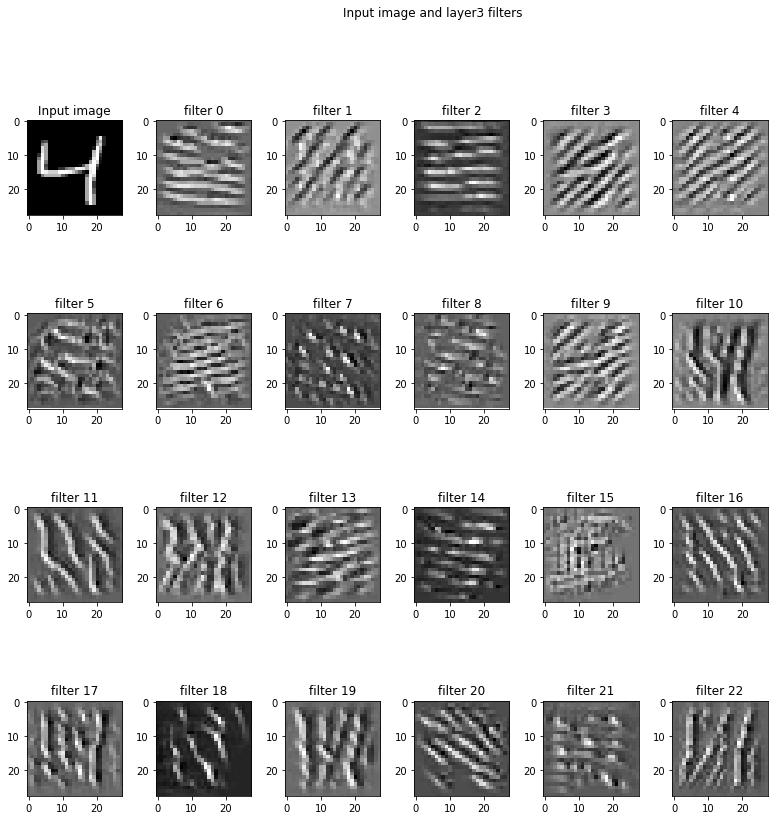

In [80]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(layer_name,img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64)):
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    print(layer_output.shape[3])
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x,plot_y, figsize = (12, 12))
    reshape = img.reshape((28, 28))
    ax[0, 0].imshow(reshape, cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter(layer_name= 'layer3')

16


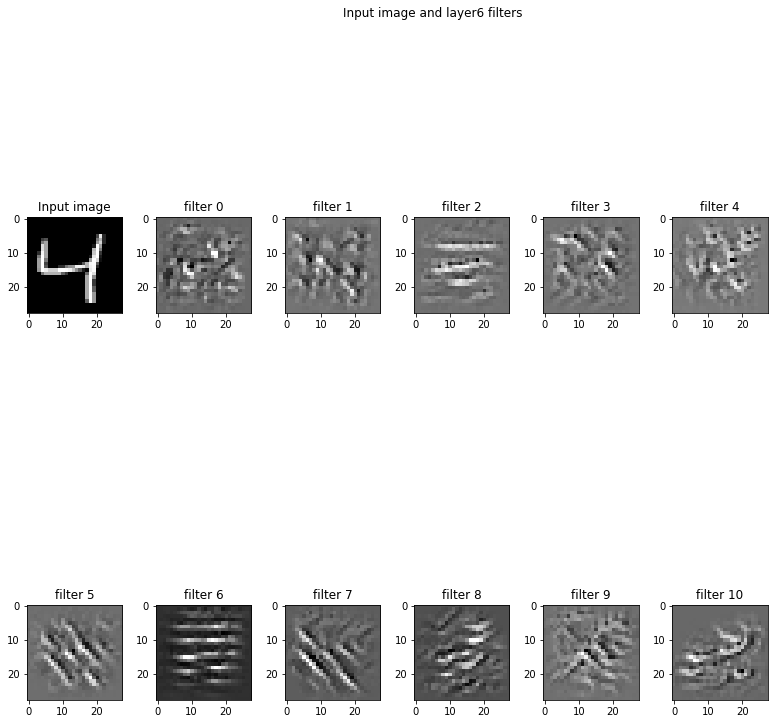

In [81]:
vis_img_in_filter(layer_name= 'layer6')

In [82]:
vis_img_in_filter(layer_name= 'layer10')

KeyError: ignored